In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("new-used-cars-dataset.csv")

# df.head()
df.tail()

,Car Names,Mileages,Ratings,Reviews,used/certified,price drop,Price
9325,2019 Lexus IS 300 Base,"61,106 mi.",4.7,"(4,658 reviews)",Used,"$2,770 price drop","$36,500"
9326,2019 Kia Sorento L,"11,132 mi.",4.8,(505 reviews),Used,$200 price drop,"$23,450"
9327,2017 GMC Acadia Denali,"55,074 mi.",3.4,(127 reviews),Used,"$2,065 price drop","$29,381"
9328,2019 Honda Pilot Elite,"57,150 mi.",4.9,"(8,222 reviews)",Honda Certified,"$2,007 price drop","$38,488"
9329,2019 GMC Terrain SLT,"56,293 mi.",4.8,"(1,293 reviews)",Used,$561 price drop,"$27,812"


In [3]:
col = []
for cols in df.columns:
    cols = cols.replace(" ","_").lower()
    col.append(cols)

In [4]:
df.columns = col

In [5]:
df.shape

(9330, 7)

### Data cleaning

In [6]:
# ---- extract year
df['year'] = df['car_names'].str.extract(r'^(\d+)')

In [7]:
df['mileages'] = df['mileages'].str.extract(r'(\d.+)\s').replace(",","")
df['mileages'] = df['mileages'].str.replace(",","")

In [8]:
df['reviews'] = df['reviews'].str.replace(",","").str.extract(r'(\d+)')

In [9]:
df['price_drop'] = df['price_drop'].str.replace(",","").str.extract(r'(\d+)')

In [10]:
df['price'] = df['price'].str.replace(",","").str.extract(r'(\d+)')

In [11]:
df.rename(columns={'price_drop':'price_drop_usd','price':'price_usd'}, inplace=True)

In [12]:
df['car_names'] = df['car_names'].str.replace('^(\d+)\s',"")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_93812\1524251122.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['car_names'] = df['car_names'].str.replace('^(\d+)\s',"")


In [13]:
def brand_func(x):
    brand = x.split()[0]
    return brand

In [14]:
df['brand'] = df['car_names'].apply(lambda x: brand_func(x))

In [15]:
def rename(x):
    if x == 'Alfa':
        return 'Alfa Romeo'
    elif x == 'Aston':
        return 'Aston Martin'
    else:
        return x

In [16]:
df['brand'] = df['brand'].apply(lambda x: rename(x))

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9330 entries, 0 to 9329
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   car_names       9330 non-null   object 
 1   mileages        9131 non-null   object 
 2   ratings         9330 non-null   float64
 3   reviews         9330 non-null   object 
 4   used/certified  9330 non-null   object 
 5   price_drop_usd  9330 non-null   object 
 6   price_usd       9327 non-null   object 
 7   year            9330 non-null   object 
 8   brand           9330 non-null   object 
dtypes: float64(1), object(8)
memory usage: 656.1+ KB


In [18]:
# df.isna().sum()
df.dropna(axis=0, inplace=True)

In [19]:
int_col = [
    'mileages', 'reviews',
    'price_drop_usd', 'price_usd', 'year'
]

for col in int_col:
    df[col] = df[col].astype(int)

### EDA

In [20]:
df_brand = df.groupby('brand').mean().reset_index()

df_brand.head()

,brand,mileages,ratings,reviews,price_drop_usd,price_usd,year
0,Acura,39214.115044,4.451327,1086.486726,1023.070796,36366.336283,2019.123894
1,Alfa Romeo,31759.055556,4.400000,1518.166667,748.888889,34663.222222,2019.055556
2,Aston Martin,16152.750000,4.450000,232.000000,562.000000,173900.000000,2019.500000
3,Audi,34055.550000,4.550000,1029.681250,1213.312500,46045.481250,2018.762500
4,BMW,44064.404645,4.528362,1235.310513,839.119804,40448.113692,2018.569682


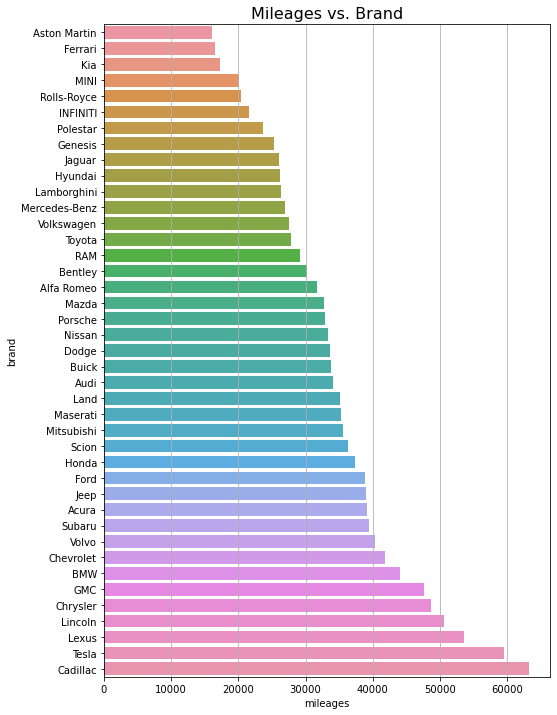

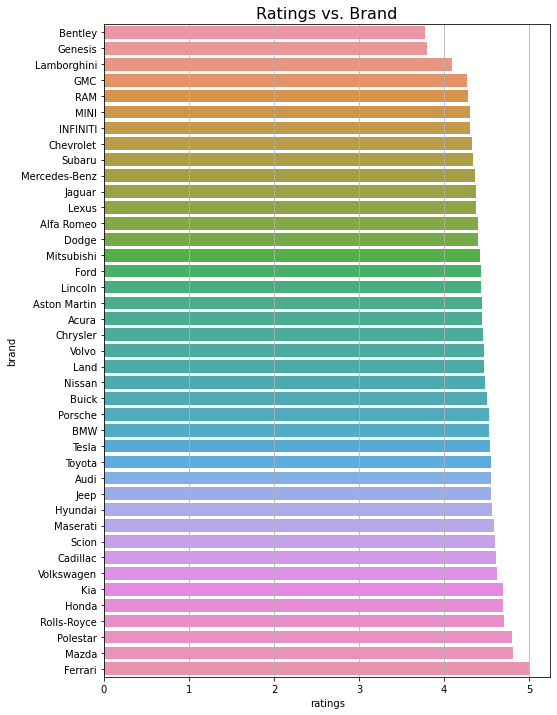

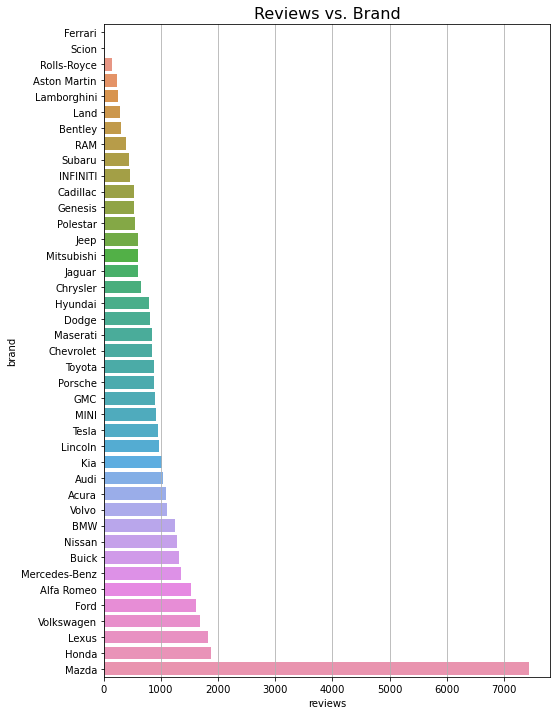

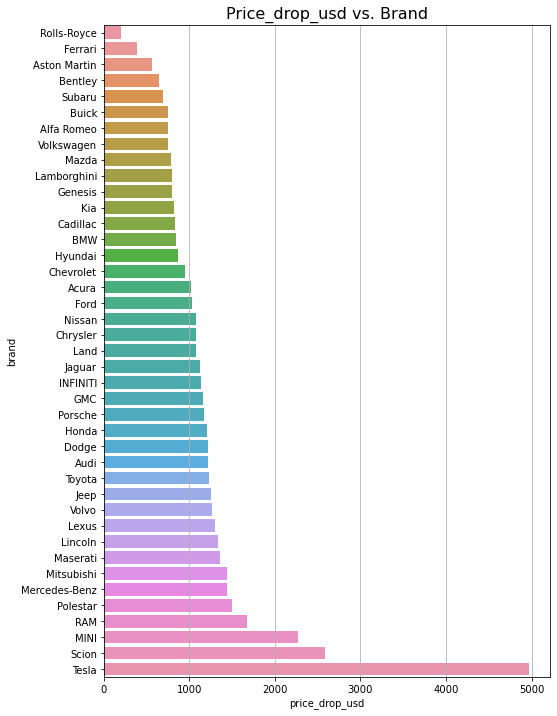

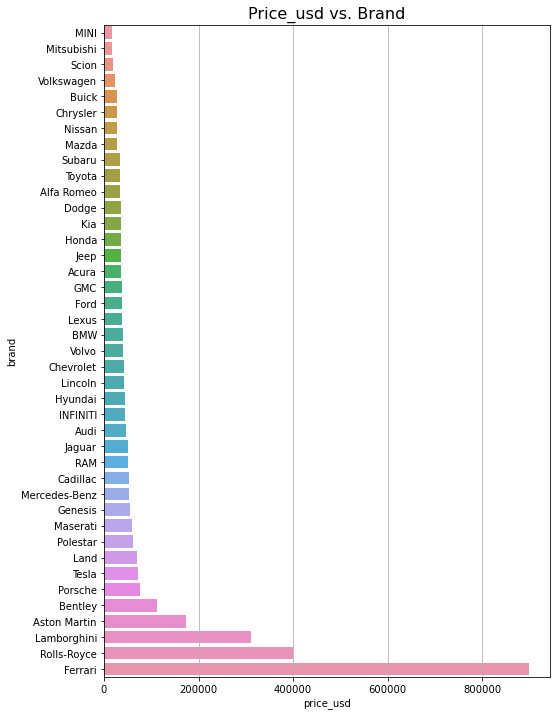

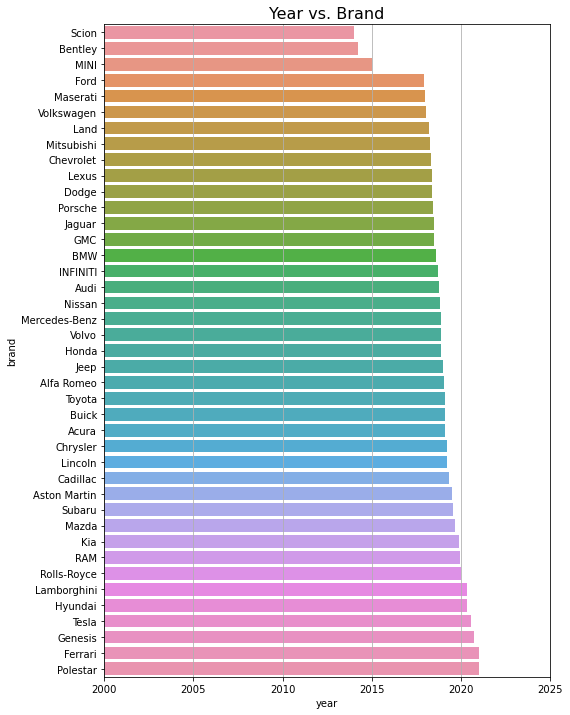

In [21]:
brand_int_col = df_brand.select_dtypes(exclude="object").columns

for col in brand_int_col:
    if col != 'year':
        plt.figure(figsize=[8,12])
        sns.barplot(
            x = col,
            y = 'brand',
            data = df_brand.sort_values(col),
            orient='horizontal'
        )
        plt.title(f'{col.capitalize()} vs. Brand', fontsize=16)
        plt.grid(True, axis='x')
        plt.show()
    else:
        plt.figure(figsize=[8,12])
        sns.barplot(
            x = 'year',
            y = 'brand',
            data = df_brand.sort_values('year'),
            orient='horizontal'
        )
        plt.title(f'{col.capitalize()} vs. Brand', fontsize=16)
        plt.xlim((2000,2025))
        plt.grid(True, axis='x')
        plt.show()

In [22]:
df_price = df.copy()

In [23]:
price_min = df['price_usd'].min()
price_max = df['price_usd'].max()

labels = ['very low','low','medium','high','very high']

df_price['price_label'] = pd.qcut(df['price_usd'], q=5, labels=labels)

In [24]:
df_price = df_price.groupby('price_label').mean().reset_index()

df_price.head()

,price_label,mileages,ratings,reviews,price_drop_usd,price_usd,year
0,very low,32150.639102,4.514348,1379.037240,780.579956,21753.547097,2016.547645
1,low,39340.135907,4.375198,1410.181914,1036.505024,31135.141724,2018.789001
2,medium,35020.974432,4.545398,1548.515341,1386.073295,37577.750568,2019.230114
3,high,40498.300493,4.566174,1380.119321,1123.170224,45887.344828,2019.678161
4,very high,39466.140351,4.441228,831.899671,1690.194079,74629.317434,2020.091009


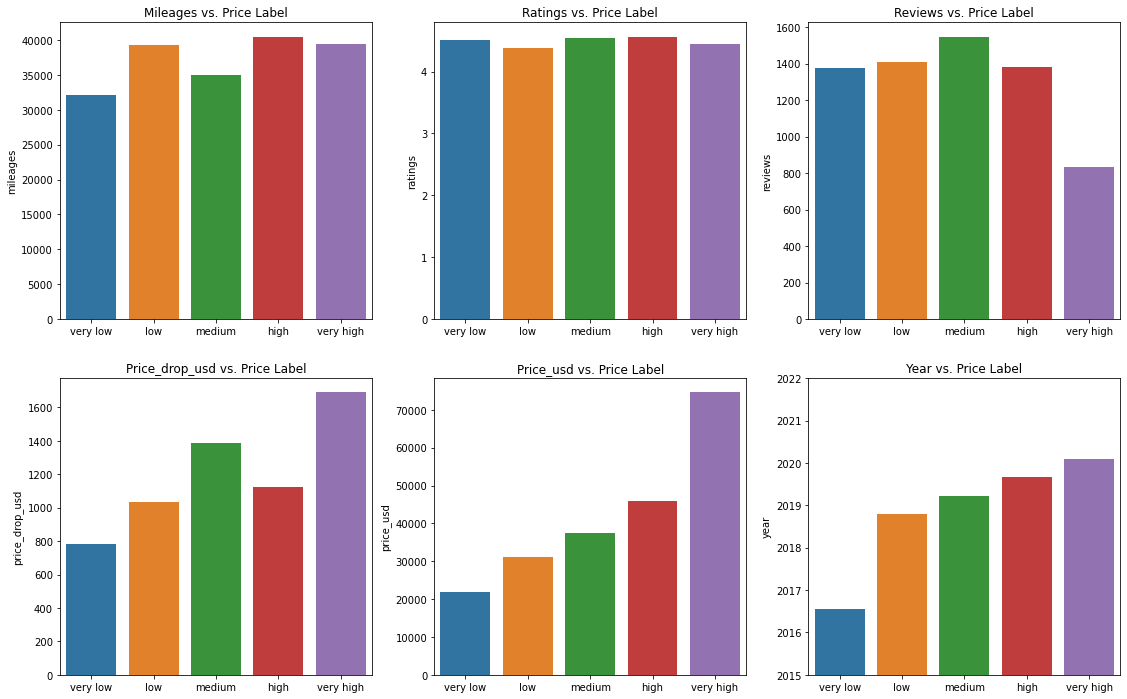

In [25]:
price_int_col = df_price.select_dtypes(include="float").columns

plt.figure(figsize=[19,12])
for num,col in zip(range(1,7),price_int_col):
    if col != 'year':
        plt.subplot(2,3,num)
        sns.barplot(
            x = 'price_label',
            y = col,
            data = df_price
        )
        plt.title(f'{col.capitalize()} vs. Price Label')
        plt.xlabel("")
    else:
        plt.subplot(2,3,num)
        sns.barplot(
            x = 'price_label',
            y = col,
            data = df_price
        )
        plt.title(f'{col.capitalize()} vs. Price Label')
        plt.xlabel("")
        plt.ylim(2015,2022)
plt.show()

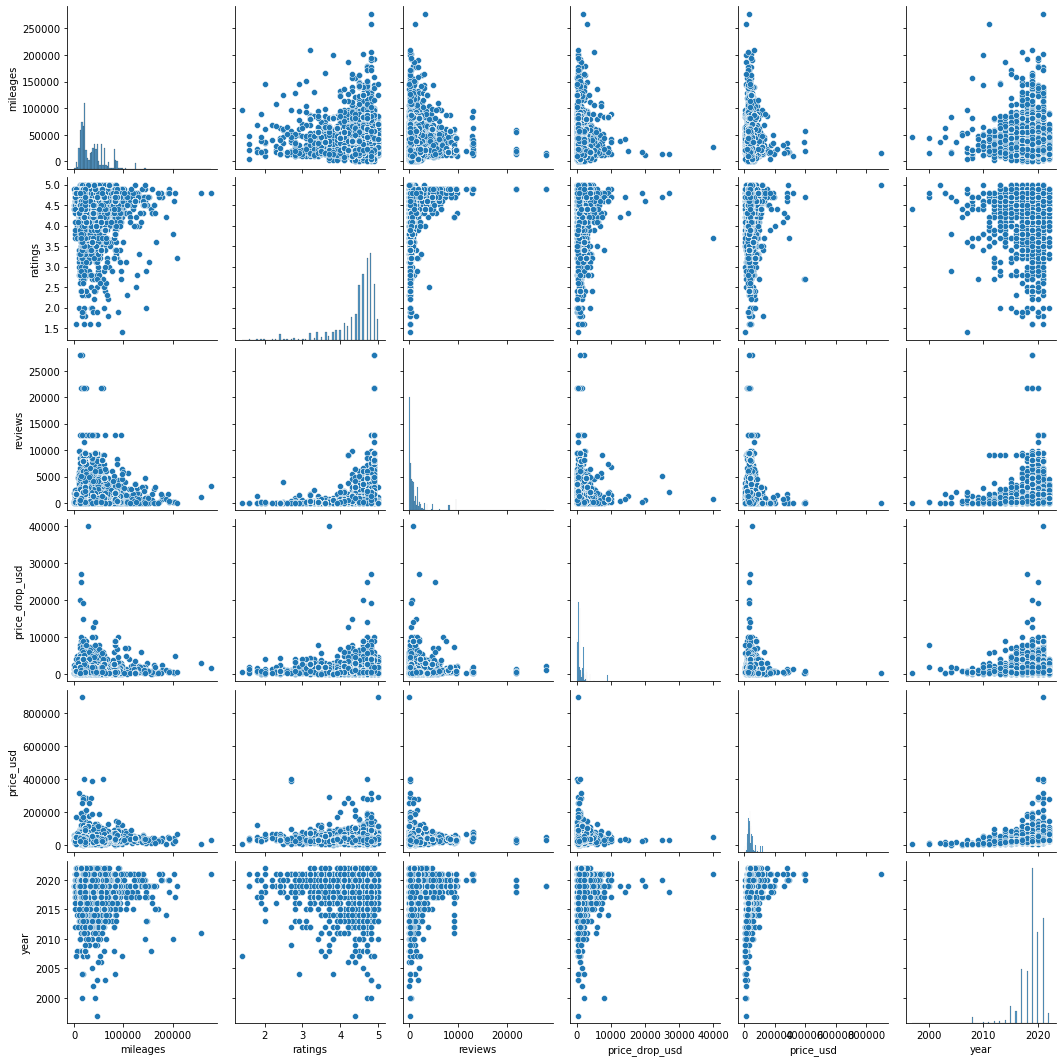

In [26]:
sns.pairplot(df)